In [255]:
import pandas as pd
import numpy as np
from sklearnex import patch_sklearn
patch_sklearn()
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


# TSNE

Read in supervised classifications and centered and scaled unlabeled data:

In [108]:
y_LinearSVC = pd.read_pickle('./data/y_pred_LinearSVC.pkl')
y_LogReg = pd.read_pickle('./data/y_pred_LogReg.pkl')
y_RidgeReg = pd.read_pickle('./data/y_pred_RidgeReg.pkl')
X = pd.read_pickle('./data/unlabeled_behavior.pkl')

Initialize a model. We want a 2-dimensional representation.

In [3]:
model = TSNE(n_components=2, perplexity=25, learning_rate='auto', metric='euclidean', init='pca',
             method='barnes_hut', square_distances=True)

Compute the embedding:

In [4]:
X_new = model.fit_transform(X)

/home/lilith/anaconda3/envs/DS4420/lib/python3.9/site-packages/daal4py/sklearn/manifold/_t_sne.py:277: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn("The PCA initialization in TSNE will change to "


Define a plotting function:

In [279]:
# plot_with_ys(x1, x2, y_class, y_cluster=None)
# Generates a 2d plot of the given data. If only y_class is given, data points will be colored by
# classification. If y_cluster is also given, data points will be colored by cluster label with shapes
# corresponding to classification. Intended for use with embeddings generated by TSNE.
# Variables:
# x1        -  array representing the position on the x-axis of each point in a 2d embedding from TSNE
# x2        -  array representing the position on the y-axis of each point in a 2d embedding from TSNE
# names     -  an array of string names for the classification algorithm used (index 0)
#              and the clustering algorithm used (index 1), for use in plotting
# y_class   -  an array of classifications from a supervised model
# y_cluster -  an array of cluster labelings (default: None)
@mpl.rc_context({'image.cmap': 'tab10', 'figure.figsize': [12.0, 8.0]})
def plot_with_ys(x1, x2, names, y_class, y_cluster=None):
    #fig = plt.figure(0)
    fig, ax = plt.subplots()
    if y_cluster is not None:
        colors = mpl.colors.ListedColormap(plt.get_cmap('tab10')(np.arange(len(np.unique(y_cluster)))))
        #with mpl.rc_context({'markers.fillstyle': 'top'}):
        x1_normal = [a for a,b in zip(x1, y_class) if b == 0]
        x2_normal = [a for a,b in zip(x2, y_class) if b == 0]
        scatter1 = ax.scatter(x1_normal, x2_normal, marker='|', cmap=colors,
                              c=y_cluster[np.argwhere(y_class == 0)])
        
        x1_outlier = [a for a,b in zip(x1, y_class) if b == 1]
        x2_outlier = [a for a,b in zip(x2, y_class) if b == 1]
        scatter2 = ax.scatter(x1_outlier, x2_outlier, marker='_', cmap=colors,
                              c=y_cluster[np.argwhere(y_class == 1)])
        
        #handles, labels = scatter1.legend_elements()
        legend1 = ax.legend(*scatter1.legend_elements(), loc="lower left", title="Clusters")
        ax.add_artist(legend1)
        
        vline = mlines.Line2D([], [], color='black', marker='|', linestyle='None',
                              markersize=10, label='0 (normal)')
        hline = mlines.Line2D([], [], color='black', marker='_', linestyle='None',
                              markersize=10, label='1 (outlier)')
        legend2 = ax.legend(handles=[vline, hline], loc="lower right", title="Classes")
        
        plt.title('TSNE '+names[1]+' Clusterings & ' +names[0]+' Classifications')
        
        filename = './figures/TSNE_'+names[1]+'_'+names[0]
        #plt.savefig(filename, format='png')
    else:
        colors = mpl.colors.ListedColormap(plt.get_cmap('tab10')(np.arange(2)))
        scatter = ax.scatter(x1, x2, marker='.', c=y_class, cmap=colors)
        legend = ax.legend(*scatter.legend_elements(), loc="lower left", title="Classes")
        plt.title('TSNE '+names[0]+' Classifications')
        
        filename = './figures/TSNE_'+names[0]
        plt.savefig(filename, format='png')

    plt.show()

Plot the embedding, colored by classifications from LinearSVC:

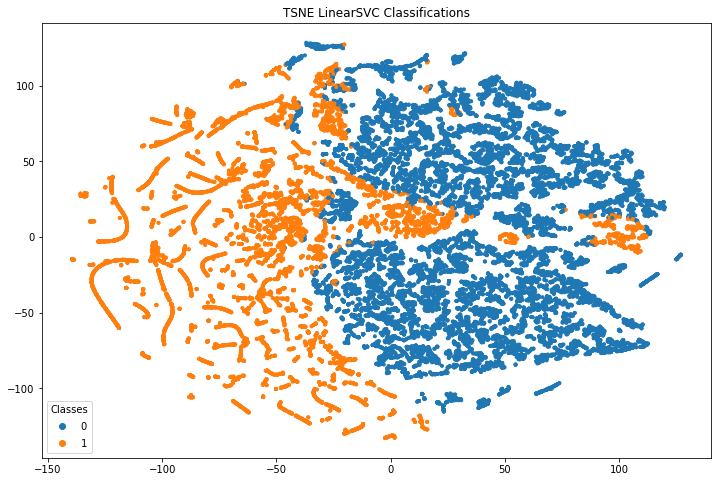

In [280]:
plot_with_ys(X_new[:,0], X_new[:,1], ['LinearSVC'], y_LinearSVC)

Plot the embedding, colored by classifications from LogReg:

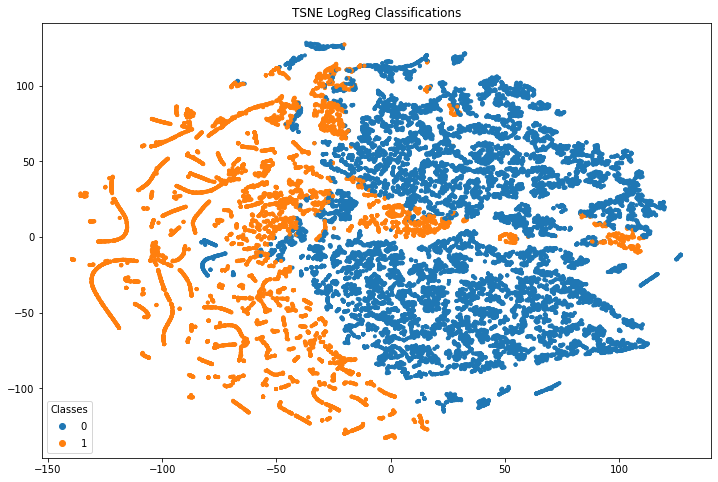

In [281]:
plot_with_ys(X_new[:,0], X_new[:,1], ['LogReg'], y_LogReg)

Plot the embedding, colored by classifications from RidgeReg:

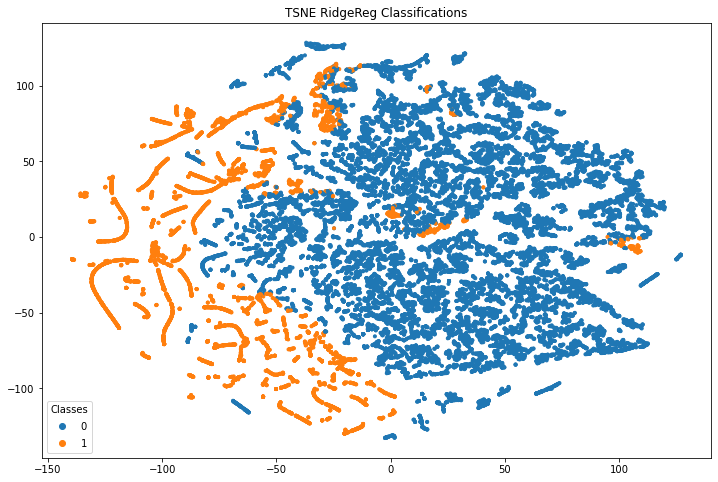

In [282]:
plot_with_ys(X_new[:,0], X_new[:,1], ['RidgeReg'], y_RidgeReg)

example plot using y_RidgeReg as though it were a clustering output

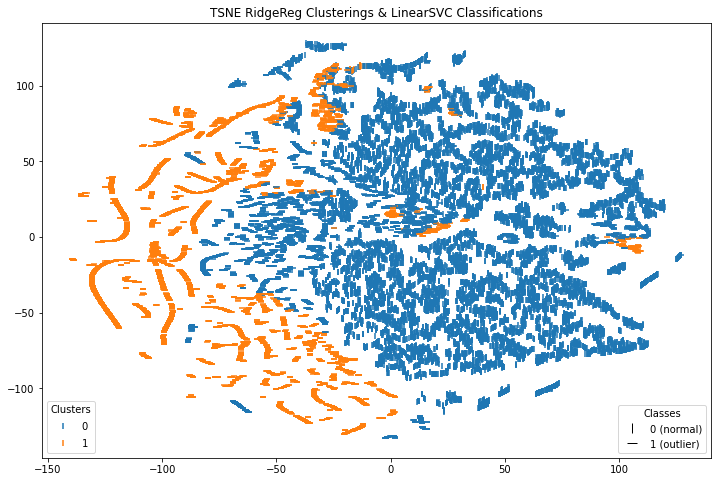

In [277]:
plot_with_ys(X_new[:,0], X_new[:,1], ['LinearSVC', 'RidgeReg'], y_LinearSVC, y_RidgeReg)